In [1]:
# 공통 임포트
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, silhouette_score


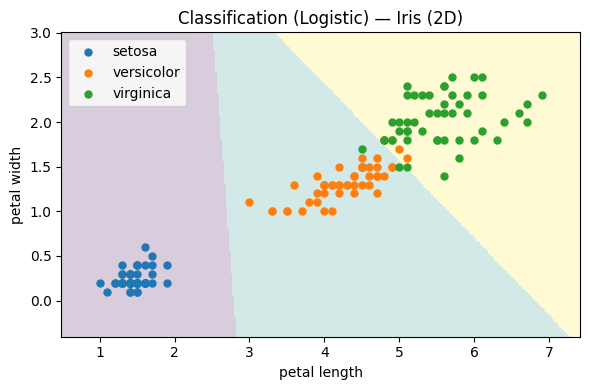

In [2]:
# ML 실습 (Classification / Regression / Clustering / PCA)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# 1) 분류 — Iris 두 특성으로 학습하고 결정경계 시각화
iris = datasets.load_iris()
Xc = iris.data[:, [2, 3]]      # 꽃잎 길이/너비 2D 특성만 사용
yc = iris.target
clf = LogisticRegression(max_iter=300).fit(Xc, yc)  # 로지스틱 회귀 학습

# 결정영역(그리드)에 대해 예측해 색칠
xx, yy = np.meshgrid(
    np.linspace(Xc[:,0].min()-0.5, Xc[:,0].max()+0.5, 300),
    np.linspace(Xc[:,1].min()-0.5, Xc[:,1].max()+0.5, 300)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.pcolormesh(xx, yy, Z, shading="auto", alpha=0.2)  # 결정경계 배경
for k in np.unique(yc):
    plt.scatter(Xc[yc==k,0], Xc[yc==k,1], s=25, label=iris.target_names[k])  # 원본 점
plt.title("Classification (Logistic) — Iris (2D)")
plt.xlabel("petal length"); plt.ylabel("petal width"); plt.legend()
plt.tight_layout(); plt.show()


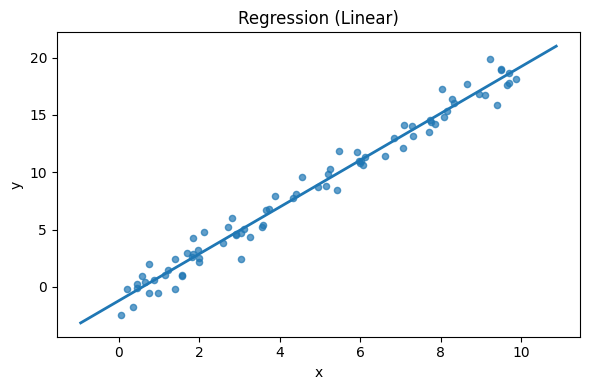

In [3]:
# 2) 회귀 — 1차 선형회귀 직선 피팅
rng = np.random.RandomState(42)
x = 10 * rng.rand(80)
y = 2*x - 1 + rng.randn(80)              # 선형관계 + 노이즈
lin = LinearRegression().fit(x[:,None], y)  # 선형회귀 학습

xfit = np.linspace(x.min()-1, x.max()+1, 200)[:,None] 
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=20, alpha=0.7)                     # 데이터 산점도
plt.plot(xfit[:,0], lin.predict(xfit), linewidth=2)    # 회귀 직선
plt.title("Regression (Linear)")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Program Files\Python38\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Program Files\Python38\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python38\lib\subprocess.py", line 1311, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


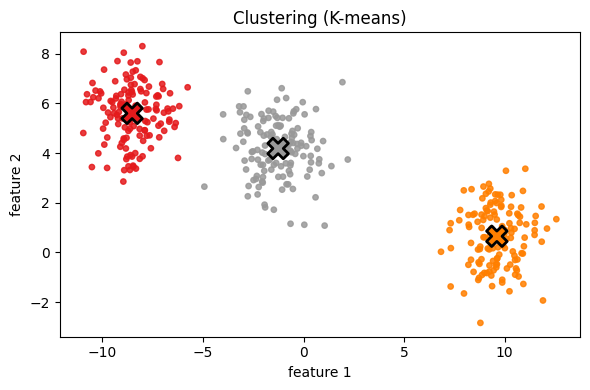

In [4]:

# 3) 군집 — K-means로 3개 군집과 중심 표시
Xg, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.2, random_state=7)
km = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=7).fit(Xg)  # k-means 학습


K = km.n_clusters
cmap = "Set1" 

plt.figure(figsize=(6,4))
plt.scatter(Xg[:,0], Xg[:,1], c=km.labels_, cmap=cmap, vmin=0, vmax=K-1, s=15, alpha=0.85)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            c=np.arange(K), cmap=cmap, vmin=0, vmax=K-1,
            marker="X", s=220, linewidths=2, edgecolors="k", alpha=1.0, zorder=3)
plt.title("Clustering (K-means)"); plt.xlabel("feature 1"); plt.ylabel("feature 2")
plt.tight_layout(); plt.show()


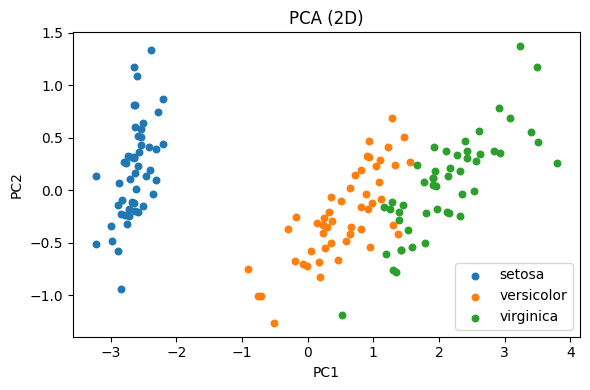

In [5]:
# 4) 차원축소 — PCA로 Iris를 2D로 투영해 시각화
Xp = PCA(n_components=2).fit_transform(iris.data)  # 4D → 2D 투영
plt.figure(figsize=(6,4))
for k in np.unique(iris.target):
    plt.scatter(Xp[iris.target==k,0], Xp[iris.target==k,1], s=22, label=iris.target_names[k])
plt.title("PCA (2D)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout(); plt.show()

In [6]:
# 필기체 숫자 분류 - scikit-learn API 활용
# 데이터 로딩 및 시각화 
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

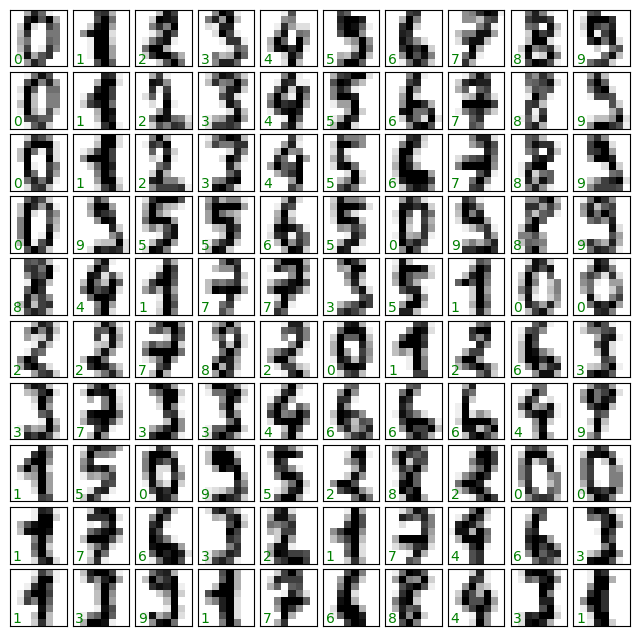

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [9]:
# 숫자에 분류 알고리즘을 적용. 데이터를 훈련 세트와 테스트 세트로 나누고 가우시안 나이브 베이즈 모델을 학습
X=digits.data
y=digits.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=None)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [12]:
# 모델을 예측했으므로 테스트 세트의 실제 값을 예측 값과 비교하여 정확도를 측정
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8377777777777777

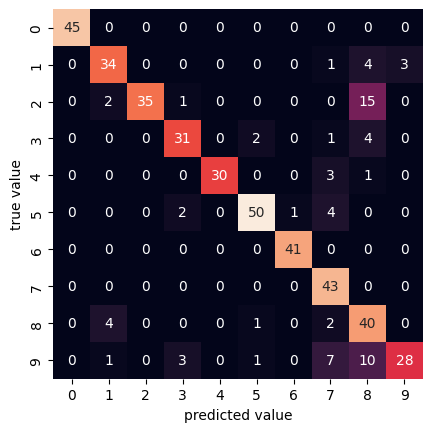

In [14]:
# 혼동 행렬을 사용. 어디에서 혼돈하는지 알기 위함.
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [15]:
# 교차검증
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
X, y = iris.data, iris.target

model = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(model, X, y, cv=5)
print("각 fold 정확도:", scores)
print("평균 정확도:", scores.mean())


각 fold 정확도: [0.96666667 1.         0.93333333 0.96666667 1.        ]
평균 정확도: 0.9733333333333334


In [16]:
# 그리드서치
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X, y)

print("최적 점수:", grid.best_score_)
print("최적 하이퍼파라미터:", grid.best_params_)
print("최적 모델:", grid.best_estimator_)


최적 점수: 0.9800000000000001
최적 하이퍼파라미터: {'n_neighbors': 7, 'weights': 'uniform'}
최적 모델: KNeighborsClassifier(n_neighbors=7)


In [17]:
#  Feature Engineering

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# (1) 혼합형 장난감 데이터: city(범주형) + rooms(수치형) → price 이진 타깃 생성
df = pd.DataFrame({
    "city":["Seoul","Busan","Seoul","Daegu","Busan"],
    "rooms":[3,2,4,3,2],
    "price":[500,350,620,480,360]
})
X = df[["city","rooms"]]
y = (df["price"]>450).astype(int)

# (2) 컬럼별 전처리 정의: 범주형→원핫, 수치형→표준화
ct = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["city"]),
    ("num", StandardScaler(), ["rooms"])
])
# (3) 전처리와 모델을 하나의 파이프라인으로 묶어 누수 방지
pipe = make_pipeline(ct, LogisticRegression(max_iter=500))
pipe.fit(X, y)
# (4) 새로운 샘플에 대한 예측
test_df = pd.DataFrame({"city": ["Seoul", "Busan"], "rooms": [3, 2]})
print("샘플 예측:", pipe.predict(test_df))


샘플 예측: [1 0]


In [19]:
# Naive Bayes 한 셀 데모: 바로 fit → predict
# [A] 연속형 특징 (Iris) → GaussianNB
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# 1) Iris 전체로 간단 학습 (데모 목적: 분할 없이)
iris = load_iris()
X, y = iris.data, iris.target
gnb = GaussianNB().fit(X, y)

print("[GaussianNB] 예측(앞 5개):", gnb.predict(X[:5]))
print("[GaussianNB] 예측확률(첫 샘플):", gnb.predict_proba(X[:1]))

# [B] 텍스트 분류 → TF-IDF → MultinomialNB
docs = [
    "buy cheap meds now",          # 스팸
    "limited time offer deal",     # 스팸
    "project meeting notes",       # 정상
    "please review the report",    # 정상
    "opengl shader tips",          # 정상
]
labels = [1,1,0,0,0]  # 0:정상, 1:스팸 (초간단 이진 분류)

nb_text = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=1.0))
nb_text.fit(docs, labels)

tests = ["free limited offer", "review project report", "cheap meds"]
print("[MultinomialNB] 텍스트 예측:", nb_text.predict(tests))


[GaussianNB] 예측(앞 5개): [0 0 0 0 0]
[GaussianNB] 예측확률(첫 샘플): [[1.00000000e+00 1.35784265e-18 7.11283512e-26]]
[MultinomialNB] 텍스트 예측: [1 0 1]


coef=2.644, intercept=4.483
R^2(test)=0.939, RMSE(test)=2.095
새 입력 예측: {3.0: 12.416, 7.0: 22.993}


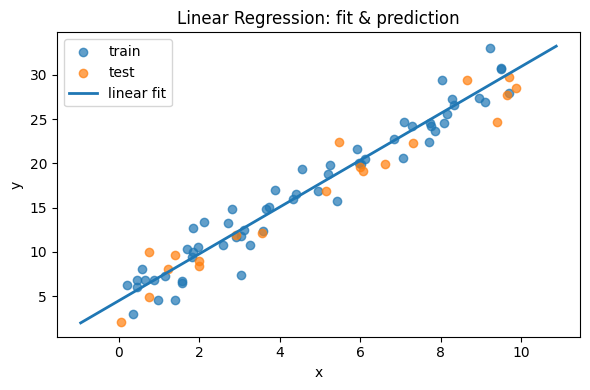

In [21]:
#  선형회귀 예측 + 시각화
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1) 장난감 데이터 생성: y = 2.5x + 5 + noise
rng = np.random.RandomState(42)
x = 10 * rng.rand(80)
y = 2.5 * x + 5 + rng.randn(80) * 2.0

X = x[:, None]  # (n,1) 형태로 변환
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=0)

# 2) 모델 학습
lin = LinearRegression().fit(X_tr, y_tr)

# 3) 성능 및 예측 예시
pred_te = lin.predict(X_te)
rmse = mean_squared_error(y_te, pred_te, squared=False)
print(f"coef={lin.coef_[0]:.3f}, intercept={lin.intercept_:.3f}")
print(f"R^2(test)={r2_score(y_te, pred_te):.3f}, RMSE(test)={rmse:.3f}")

new_x = np.array([[3.0],[7.0]])
print("새 입력 예측:", dict(zip(new_x.ravel(), lin.predict(new_x).round(3))))

# 4) 시각화 (산점도 + 회귀직선)
x_line = np.linspace(X.min()-1, X.max()+1, 200)[:, None]
y_line = lin.predict(x_line)

plt.figure(figsize=(6,4))
plt.scatter(X_tr, y_tr, label="train", alpha=0.7)
plt.scatter(X_te, y_te, label="test",  alpha=0.7)
plt.plot(x_line, y_line, linewidth=2, label="linear fit")
plt.title("Linear Regression: fit & prediction")
plt.xlabel("x"); plt.ylabel("y"); plt.legend()
plt.tight_layout(); plt.show()


In [25]:
# SVM 분류 : Iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1) 데이터 로드 & 분할(계층 유지)
X, y = load_iris(return_X_y=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y)

# 2) 파이프라인: 스케일링 + RBF SVM (합리적 기본값)
clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
clf.fit(Xtr, ytr)

# 3) 평가
yp = clf.predict(Xte)
print("Accuracy:", accuracy_score(yte, yp))
print(classification_report(yte, yp, target_names=["setosa","versicolor","virginica"]))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# RandomForest on Iris
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=None)

model =RandomForestClassifier()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

Acc = accuracy_score(y_test,y_pred)

print("Acc",Acc)

Acc 0.9333333333333333
